# Ads on Social Networks




## Comprehension du problème :

L'objectif est d'utiliser la méthode de classification binaire afin de determiner si oui ou non un utilisateur achetera un produit vu sur les reseaux sociaux. Et cela en fonction de son age (valeur numérique), sexe (valeur binaire), salaire (valeur numérique).

La variable cible est nommée Achat_effectue. C'est celle ci que je cherche à prédire.

Ce Dataset de 400 lignes a été extrait de la base de données d'une startup américaine se basant sur les statistiques des utilisateurs de réseaux sociaux.



Le format du dataset fourni est en CSV

Il peut y avoir plusieurs raisons qui peuvent mener une boite à faire cette étude comme l'optimisation des stratégies Marketing, personnaliser l'experience utilisateur ou encore reduire les couts marketing. Le but depend donc des objectifs de la boite.  





In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px

# Charger le dataset dans un DataFrame
df = pd.read_csv("reseau_sociaux.csv")

La fonction df.describe() pour obtenir des statistiques descriptives telles que la moyenne, l'écart-type, la médiane, les quartiles, etc. relative aux variables numériques de notre dataset (âge, salaire). Cela permet de vérifiez les statistiques de base pour comprendre la distribution et la variabilité des données.

In [3]:
df.describe()

,id_utilisateur,Age,Salaire_estime,Achat_effectue
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Code alternatif

In [4]:
# Statistiques descriptives pour les variables numériques
print(df[['Age', 'Salaire_estime']].describe())


              Age  Salaire_estime
count  400.000000      400.000000
mean    37.655000    69742.500000
std     10.482877    34096.960282
min     18.000000    15000.000000
25%     29.750000    43000.000000
50%     37.000000    70000.000000
75%     46.000000    88000.000000
max     60.000000   150000.000000


In [5]:
df.head()

,id_utilisateur,Genre,Age,Salaire_estime,Achat_effectue
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.tail()

,id_utilisateur,Genre,Age,Salaire_estime,Achat_effectue
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
df.shape

(400, 5)

In [8]:
salary_column = df["Salaire_estime"]

mean_value = salary_column.mean()
median_value = salary_column.median()

print("Moyenne :", mean_value)
print("Médiane :", median_value)
print("Minimum :", salary_column.min())
print("Maximum :", salary_column.max())


Moyenne : 69742.5
Médiane : 70000.0
Minimum : 15000
Maximum : 150000


In [9]:
age_column = df["Age"]

mean_value = age_column.mean()
median_value = age_column.median()

print("Moyenne :", mean_value)
print("Médiane :", median_value)
print("Minimum :", age_column.min())
print("Maximum :", age_column.max())


Moyenne : 37.655
Médiane : 37.0
Minimum : 18
Maximum : 60


J'ai trouvé pertinent de calculer la moyenne et la mediane des salaires des personnes ayant effectué un achat. Et ensuite, de regarder le max et min du salaire de cette catégorie de personne.

In [10]:
achats_effectues = df[df['Achat_effectue'] == 1]

mean_value = achats_effectues['Salaire_estime'].mean()
median_value = achats_effectues['Salaire_estime'].median()

print("Moyenne :", mean_value)
print("Médiane :", median_value)
print("Minimum :", achats_effectues['Salaire_estime'].min())
print("Maximum :", achats_effectues['Salaire_estime'].max())


Moyenne : 86272.72727272728
Médiane : 90000.0
Minimum : 20000
Maximum : 150000


J'ai également trouvé pertinent de calculer l'age moyen des personnes ayant effectué un achat. Aussi, de regarder leur age max et min.

In [11]:
# Filtrer les données pour inclure uniquement les personnes ayant effectué un achat
achats_effectues = df[df['Achat_effectue'] == 1]

mean_value = achats_effectues['Age'].mean()
median_value = achats_effectues['Age'].median()

print("Moyenne :", mean_value)
print("Médiane :", median_value)
print("Minimum :", achats_effectues['Age'].min())
print("Maximum :", achats_effectues['Age'].max())


Moyenne : 46.39160839160839
Médiane : 47.0
Minimum : 27
Maximum : 60




quel pourcentage d'acheteurs sont des femmes


In [14]:
# Filtrer les données pour inclure uniquement les personnes ayant effectué un achat
achats_effectues = df[df['Achat_effectue'] == 1]


# Calcul du nombre des femmes ayant effectué un achat
nombre_femmes = achats_effectues['Genre'].value_counts().get('Female', 0)
print("Nombre total de femmes dans le dataset filtré :", nombre_femmes)

# Calcul du nombre des personnes (femmes & hommes) ayant effectués un achat
nombre_total_individus = len(achats_effectues)
print("Nombre total d'individus dans le dataset filtré :", nombre_total_individus)

pourcentage_femmes_ayant_effectue_achat = ( nombre_femmes * 100 ) / nombre_total_individus
print("Pourcentage de femmes ayant effectué un achat :",round(pourcentage_femmes_ayant_effectue_achat),"%")

pourcentage_hommes_ayant_effectue_achat = 100 - pourcentage_femmes_ayant_effectue_achat
print("Pourcentage de hommes ayant effectué un achat :", round(pourcentage_hommes_ayant_effectue_achat), "%")

Nombre total de femmes dans le dataset filtré : 77
Nombre total d'individus dans le dataset filtré : 143
Pourcentage de femmes ayant effectué un achat : 54 %
Pourcentage de hommes ayant effectué un achat : 46 %


## Visualisation des distributions

Ici, j'utilise un histogramme afin de visualiser la distribution des variables numériques.

Ainsi que deux diagrammes en barres pour visualiser la distribution des variables catégorielles (genre, achat_effectue).

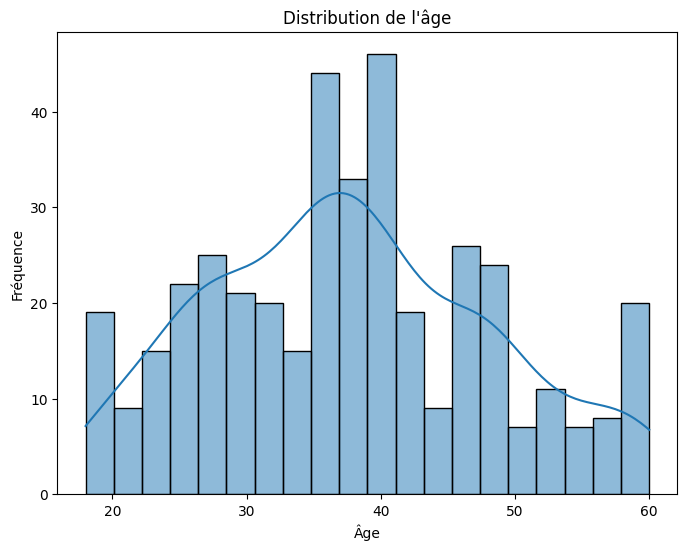

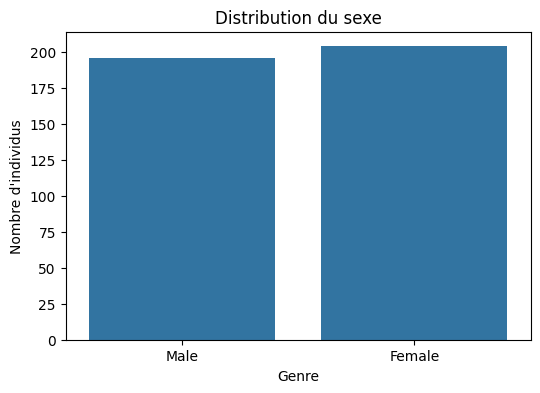

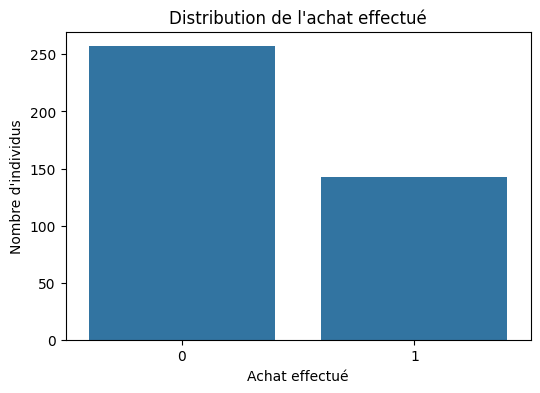

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de la distribution de l'âge
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

# Diagramme en barres pour la distribution du sexe
plt.figure(figsize=(6, 4))
sns.countplot(x='Genre', data=df)
plt.title('Distribution du sexe')
plt.xlabel('Genre')
plt.ylabel('Nombre d\'individus')
plt.show()

# Diagramme en barres pour la distribution de l'achat effectué
plt.figure(figsize=(6, 4))
sns.countplot(x='Achat_effectue', data=df)
plt.title('Distribution de l\'achat effectué')
plt.xlabel('Achat effectué')
plt.ylabel('Nombre d\'individus')
plt.show()


## Analyse de corrélation

Ici, j'utilise une matrice de corrélation pour évaluer la corrélation entre les valeurs numériques (age et salaire estimé)

Dans un second temps, j'utilise des diagrammes en barres pour évaluer la corrélation entre les variables catégorielles et la variable cible (Genre et achat effectué)

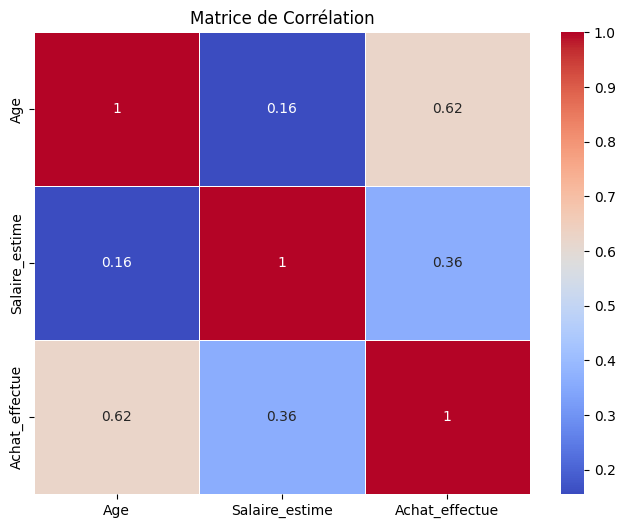

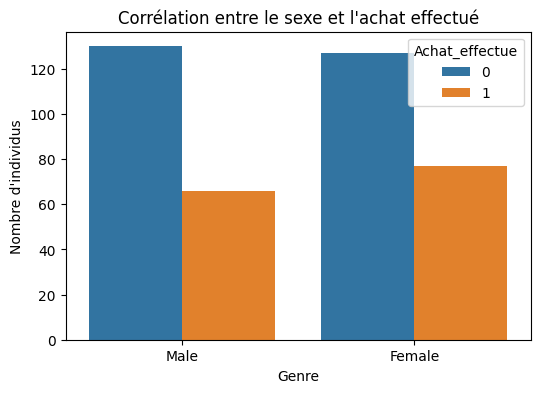

In [16]:
# Matrice de corrélation
correlation_matrix = df[['Age', 'Salaire_estime', 'Achat_effectue']].corr()

# Heatmap de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()

# Diagramme en barres pour la corrélation entre le sexe et l'achat effectué
plt.figure(figsize=(6, 4))
sns.countplot(x='Genre', hue='Achat_effectue', data=df)
plt.title('Corrélation entre le sexe et l\'achat effectué')
plt.xlabel('Genre')
plt.ylabel('Nombre d\'individus')
plt.show()


## Gestion des Valeurs Manquantes :

Ensuite, il convient d'identifier les valeurs manquantes et de les traiter. Dans notre , on remarque qu'il 0 valeur manquante dans notre dataset. Donc, aucun traitement n'est necessaire. Dans le cas où il y aurait eu des valeurs manquantes, on les aurait remplacer par la moyenne de cette variable numérique correspondante


In [18]:
# Vérification des valeurs manquantes
print(df.isnull().sum())

# Suppression des lignes avec des valeurs manquantes (si nécessaire)
df_cleaned = df.dropna()


id_utilisateur    0
Genre             0
Age               0
Salaire_estime    0
Achat_effectue    0
dtype: int64


## Identification des Données Aberrantes :

j'utilise des diagrammes de boîte à moustaches (boxplots) pour identifier les valeurs aberrantes dans les variables numériques.

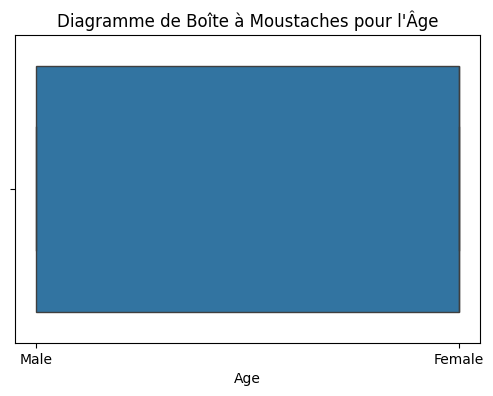

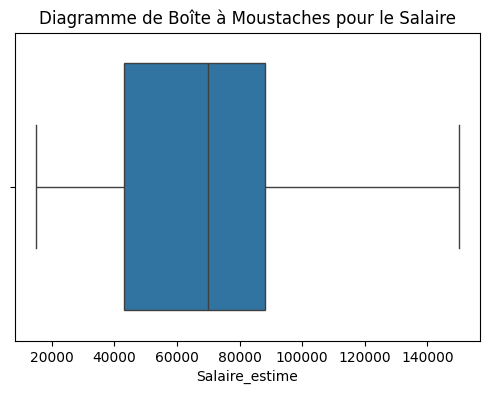

In [19]:
# Diagramme de boîte à moustaches pour l'âge
plt.figure(figsize=(6, 4))
sns.boxplot(x='Genre', data=df)
plt.title('Diagramme de Boîte à Moustaches pour l\'Âge')
plt.xlabel('Age')
plt.show()

# Diagramme de boîte à moustaches pour le salaire
plt.figure(figsize=(6, 4))
sns.boxplot(x='Salaire_estime', data=df)
plt.title('Diagramme de Boîte à Moustaches pour le Salaire')
plt.xlabel('Salaire_estime')
plt.show()


## prétraitement des données

Pour la gestion des Variables Catégorielles,  dans notre cas, on en a qu'une seule : Genre. J'ai choisi de la laisser telle qu'elle. Mais en ce qui concerne les variables numériques, elles requierent une standardisation : centrer les données autour de zéro avec un écart-type de 1. Utile pour des modèles qui supposent une distribution normale des données.

Notre code ci-dessous réalise plusieurs étapes de prétraitement des données, y compris le chargement des données, la séparation des variables indépendantes et de la variable cible, l'encodage de la variable catégorielle 'Genre' (utilisant le Label Encoding), et la standardisation des variables numériques 'Age' et 'Salaire_estime'.

Après l'exécution de ce code, on aura donc divisé nos données en ensembles d'entraînement et de test, effectué l'encodage des variables catégorielles et la standardisation des variables numériques.

In [22]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Séparation des variables indépendantes (X) et de la variable cible (y)
X = df[['Age', 'Genre', 'Salaire_estime']]
y = df['Achat_effectue']

# Encodage de la variable catégorielle 'sexe' (Label Encoding pour une variable binaire)
label_encoder = LabelEncoder()
X['Genre'] = label_encoder.fit_transform(X['Genre'])

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des variables numériques (age, salaire)
scaler = StandardScaler()
X_train[['Age', 'Salaire_estime']] = scaler.fit_transform(X_train[['Age', 'Salaire_estime']])
X_test[['Age', 'Salaire_estime']] = scaler.transform(X_test[['Age', 'Salaire_estime']])


## Séparation des données

La séparation des données en ensembles d'entraînement, de validation et de test est une étape super importante dans la construction de modèles d'apprentissage automatique.

Dans ce code, les données sont d'abord divisées en ensembles d'entraînement temporaire (80%) et de test (20%). Ensuite, l'ensemble d'entraînement temporaire est divisé en ensembles d'entraînement final (80%) et de validation (20%).

On obtient comme sorties : la taille des ensembles d'entraînement, de validation et de test sont respectivement de l'ordre de 256, 64 et 80 échantillons.

In [24]:
from sklearn.model_selection import train_test_split

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Séparation des variables indépendantes (X) et de la variable cible (y)
X = df[['Age', 'Genre', 'Salaire_estime']]
y = df['Achat_effectue']

# Encodage de la variable catégorielle 'sexe' (Label Encoding pour une variable binaire)
label_encoder = LabelEncoder()
X['Genre'] = label_encoder.fit_transform(X['Genre'])

# Séparation des données en ensembles d'entraînement, de validation et de test
# Ici, on divise d'abord en train (80%) et temp (20%)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensuite, on divise 'temp' en train (80%) et validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=42)

# Vérification des tailles des ensembles
print("Taille de l'ensemble d'entraînement :", len(X_train))
print("Taille de l'ensemble de validation :", len(X_val))
print("Taille de l'ensemble de test :", len(X_test))


Taille de l'ensemble d'entraînement : 256
Taille de l'ensemble de validation : 64
Taille de l'ensemble de test : 80


## Choix du modele

On a choisi d'utiliser la classification avec le modele RandomForest, un modèle d'arbres de décision ensembliste.

 Ensuite, on entraîne le modèle sur l'ensemble d'entraînement en utilisant les caractéristiques d'entrée et les étiquettes de classe.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Séparation des variables indépendantes (X) et de la variable cible (y)
X = df[['Age', 'Genre', 'Salaire_estime']]
y = df['Achat_effectue']

# Encodage de la variable catégorielle 'sexe'
label_encoder = LabelEncoder()
X['Genre'] = label_encoder.fit_transform(X['Genre'])

# Création du modèle RandomForest
model = RandomForestClassifier(random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de validation
y_val_pred = model.predict(X_val)

# Évaluation du modèle
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Précision sur l\'ensemble de validation : {accuracy:.2f}')

# Autres métriques d'évaluation
print('Rapport de classification :\n', classification_report(y_val, y_val_pred))

# Validation croisée pour une évaluation plus robuste
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print('Précision moyenne avec validation croisée :', cross_val_scores.mean())


Précision sur l'ensemble de validation : 0.89
Rapport de classification :
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.81      0.85      0.83        20

    accuracy                           0.89        64
   macro avg       0.87      0.88      0.87        64
weighted avg       0.89      0.89      0.89        64

Précision moyenne avec validation croisée : 0.8906485671191554


## Validation et optimisation

Après l'entraînement initial, on utilise l'ensemble de validation pour ajuster les hyperparamètres du modèle.

On peut répéter le processus jusqu'à ce que le modèle atteigne les performances souhaitées

In [26]:
# Exemple d'ajustement des hyperparamètres pour RandomForest
from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres à explorer
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Créer le modèle RandomForest
model = RandomForestClassifier(random_state=42)

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres :", best_params)

# Utiliser le modèle avec les meilleurs hyperparamètres pour faire des prédictions
best_model = grid_search.best_estimator_


Meilleurs hyperparamètres : {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}


## Evaluation sur l'ensemble du test

Ici, on évalue les performances du modèle sur l'ensemble de test pour obtenir une estimation impartiale de sa capacité à généraliser sur de nouvelles données.

In [27]:
# Utiliser le modèle avec les meilleurs hyperparamètres pour faire des prédictions sur l'ensemble de test
y_test_pred = best_model.predict(X_test)

# Évaluation du modèle sur l'ensemble de test
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Précision sur l\'ensemble de test : {test_accuracy:.2f}')


Précision sur l'ensemble de test : 0.93


## Interprétation des Résultats

Ensuite, on examine différentes métriques de performance telles que la précision. On affiche le rapport de classification.

In [28]:
from sklearn.metrics import classification_report

# Afficher le rapport de classification
print('Rapport de classification sur l\'ensemble de test :\n', classification_report(y_test, y_test_pred))


Rapport de classification sur l'ensemble de test :
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        52
           1       0.89      0.89      0.89        28

    accuracy                           0.93        80
   macro avg       0.92      0.92      0.92        80
weighted avg       0.93      0.93      0.93        80



## Interprétation des prédictions du modèle pour comprendre ses décisions

 On essaie d'interpreter les prédictions du modèle pour comprendre comment il prend des décisions  inspecter l'importance des caractéristiques.

In [29]:
# Afficher l'importance des caractéristiques pour RandomForest
feature_importances = best_model.feature_importances_
print('Importance des caractéristiques :\n', feature_importances)


Importance des caractéristiques :
 [0.54851005 0.0096511  0.44183885]


Enfin, on va prévisualiser le graphique d'importance des caractéristiques après l'entraînement d'un modèle RandomForest

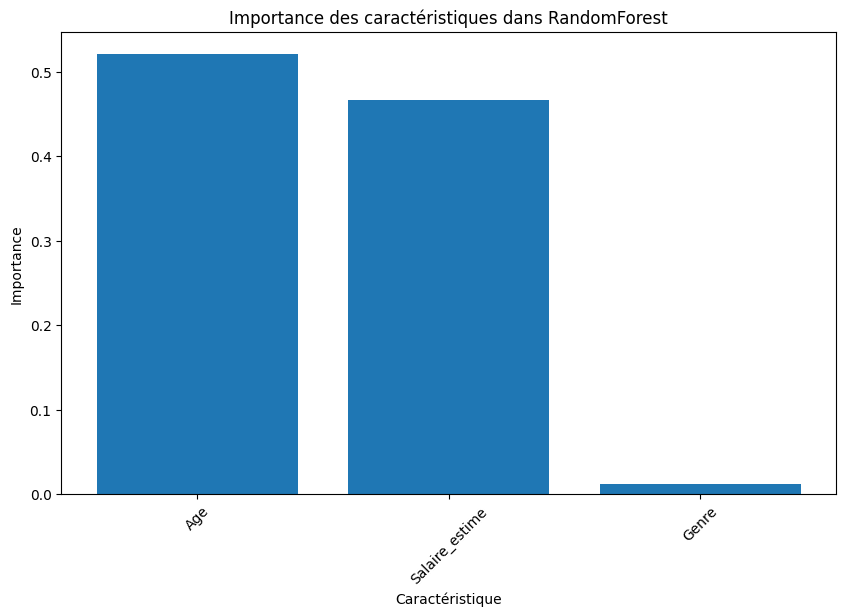

In [30]:
import matplotlib.pyplot as plt

# Création du modèle RandomForest
model = RandomForestClassifier(random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Obtention de l'importance des caractéristiques
feature_importances = model.feature_importances_

# Création d'un DataFrame avec les noms de caractéristiques et leur importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Trier le DataFrame par importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Tracé d'un graphique à barres d'importance des caractéristiques
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Importance des caractéristiques dans RandomForest')
plt.xlabel('Caractéristique')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

## Testing

Apres avoir entrainer notre modele, on a voulu évaluer la capacité de notre modèle à prédire si un utilisateur effectuera ou non un achat et voici le resultat. On peut remarquer que 93% des prédictions positives étaient correctes. Nous avons plusieurs données qui permettent de determiner le niveau de performance de notre modele (précision, rappel, etc). Il faut noter que ces resultats la peuvent evoluer en fonction de plusieurs facteurs, tels que le changement des données d'entrée, si le modèle est régulièrement réentraîné avec de nouvelles données...etc

Précision : 0.93
Rappel : 0.93
F1-score : 0.93
Accuracy : 0.95
ROC AUC : 0.97
Matrice de Confusion :
[[50  2]
 [ 2 26]]


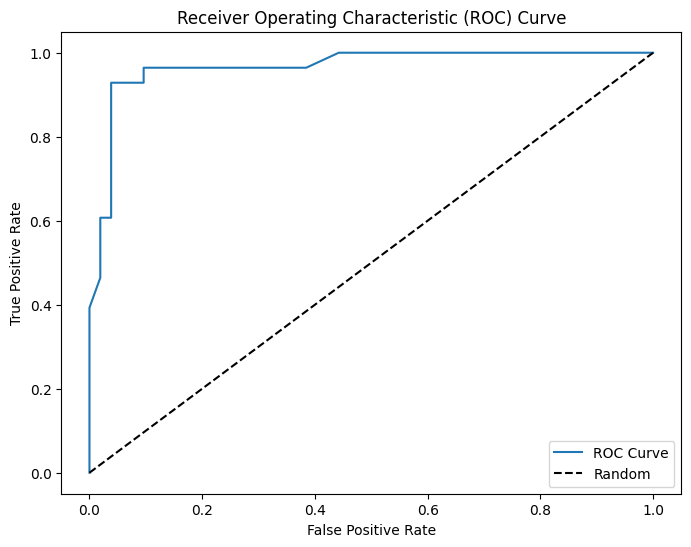

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Métriques d'évaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Affichage des métriques
print(f'Précision : {precision:.2f}')
print(f'Rappel : {recall:.2f}')
print(f'F1-score : {f1:.2f}')
print(f'Accuracy : {accuracy:.2f}')
print(f'ROC AUC : {roc_auc:.2f}')

# Affichage de la Matrice de Confusion
print('Matrice de Confusion :')
print(conf_matrix)

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
